# Chapter: Automated Equipment Monitoring Using Sound


# Topic: Spectrogram from audio data

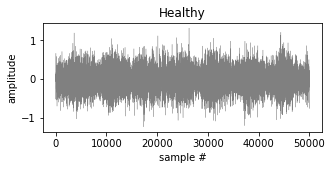

In [1]:
# import required packages and load audio data
import numpy as np, matplotlib.pyplot as plt
import librosa
import librosa.display

clipPath = "AirCompressor_Data/Healthy/preprocess_Reading1.dat"
data = np.loadtxt(clipPath, delimiter=',')

# time waveform
plt.figure(figsize=(5,2))
plt.plot(data, 'grey', linewidth=0.3)
plt.title('Healthy'), plt.xlabel('sample #'), plt.ylabel('amplitude')
plt.show()

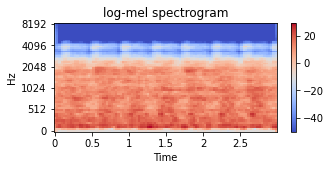

In [2]:
# log-mel spectrogram
sr = 50000/3 # sampling rate: 50000 samples per 3 seconds
mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=64)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

plt.figure(figsize=(5,2))
img = librosa.display.specshow(log_mel_spectrogram, x_axis="time", y_axis="mel", sr=sr)
plt.colorbar(), plt.title('log-mel spectrogram')

plt.show()

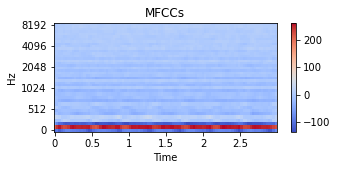

In [3]:
# mfcc
MFCCs=librosa.feature.mfcc(y=data, sr=sr, n_mfcc=40)

plt.figure(figsize=(5,2))
librosa.display.specshow(MFCCs, x_axis="time", y_axis="mel", sr=sr)
plt.colorbar(), plt.title('MFCCs')

plt.show()

In [4]:
#%% combine spectrogram and MFCCs
acoustic_featureMap = np.concatenate((MFCCs, log_mel_spectrogram), axis=0)
print(acoustic_featureMap.shape)

(104, 98)
